# Notebook to explore clean data


[Wind generation in ERCOT](#Wind-generation)  
[923 annual generation](#EIA-923-data)  
[860 plant capacities](#EIA-860-data)  
[EPA hourly data](#EPA-hourly-data)

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cPickle as pickle
import gzip

/Users/Home/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Wind generation

ERCOT provides hourly data on the aggregate level of wind power across the state from 2007-2015. The data files also contain total ERCOT load in MW and the total installed capacity of wind turbines (MW). With this data we can see how ERCOT demand evolved over the 8 years, how wind generation  increased, and the change in how much of the total load was met with wind.

In [2]:
filename = 'ERCOT wind data.csv'
path = '../Clean Data'
fullpath = os.path.join(path, filename)

In [3]:
ercot = pd.read_csv(fullpath, index_col=0)

In [132]:
ercot.head()

,"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW","Wind Output, % of Installed","Wind Output, % of Load",1-hr MW change,1-hr % change
2007-01-01 00:00:00,30428.0,2790.0,1074.0,38.494624,3.529644,NaN,NaN
2007-01-01 01:00:00,30133.0,2790.0,922.6,33.068100,3.061760,-151.4,-14.096834
2007-01-01 02:00:00,29941.0,2790.0,849.2,30.437276,2.836245,-73.4,-7.955777
2007-01-01 03:00:00,29949.0,2790.0,1056.3,37.860215,3.526996,207.1,24.387659
2007-01-01 04:00:00,30248.0,2790.0,837.1,30.003584,2.767456,-219.2,-20.751680


Distribution of wind output as % of load for the whole dataset.

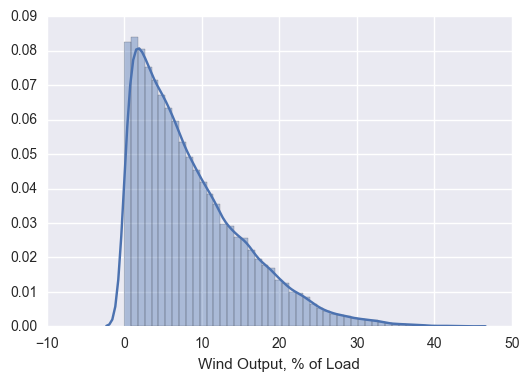

In [5]:
sns.distplot(ercot['Wind Output, % of Load'])

How does this distribution change over time? Need to set a year column.

In [5]:
#Define year and month for the visualizations below
ercot['month'] = pd.to_datetime(ercot.index).month
ercot['year'] = pd.to_datetime(ercot.index).year

The figures below shows a clear shift in the amount of generation from wind over time. In 2007 it was rarely above 10%, and the lowest bin is ~40% of the total. The distribution flattens considerably by 2010, and by 2013 starts creeping above 30% of total load.

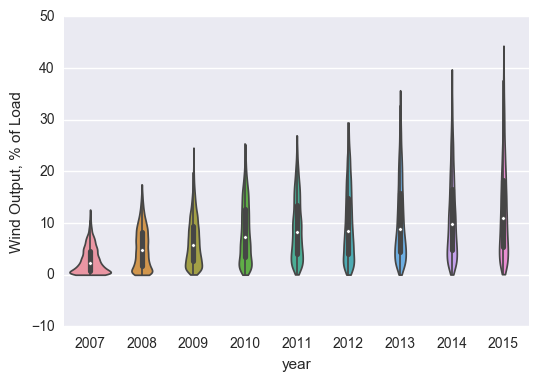

In [7]:
sns.violinplot(x='year', y='Wind Output, % of Load', data=ercot, cut=0, linewidth=1.25)

# path = os.path.join('..', 'Midterm Report', 'Wind violin plot.svg')
# plt.savefig(path)

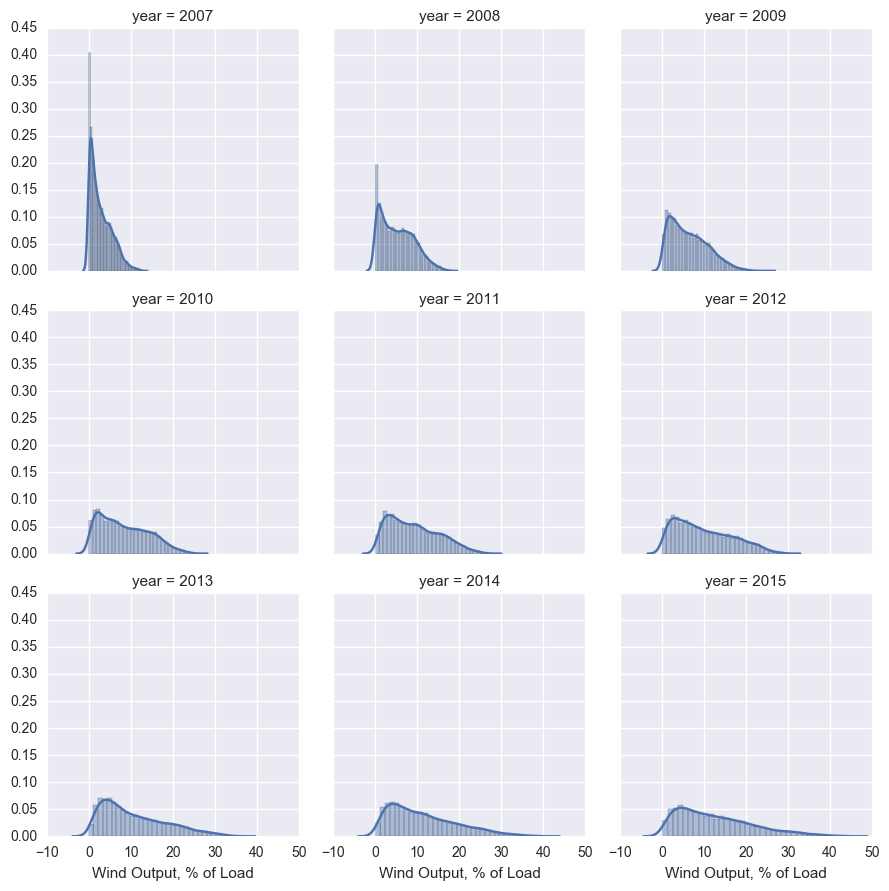

In [7]:
g = sns.FacetGrid(ercot, col='year', col_wrap=3)
g.map(sns.distplot, 'Wind Output, % of Load')

**The figures below look at total ERCOT load.**

This figure shows that average load across an entire year has been increasing over time.

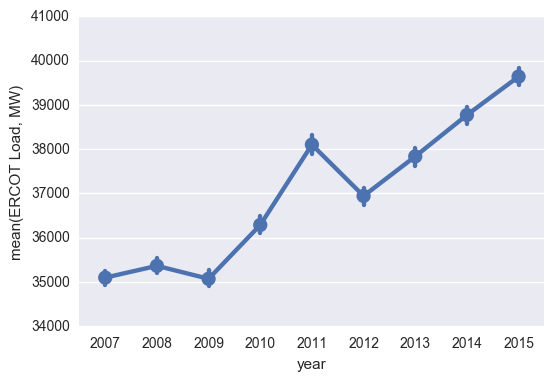

In [54]:
sns.pointplot('year', 'ERCOT Load, MW', data=ercot)

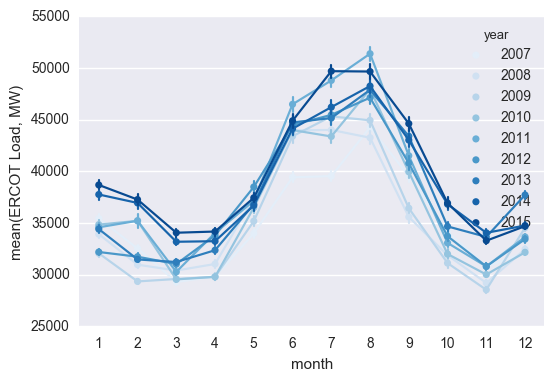

In [41]:
sns.pointplot('month', 'ERCOT Load, MW', data=ercot, hue='year', 
              palette='Blues', scale=0.5)

Interesting. There is far less of a monthly pattern to the wind generation.

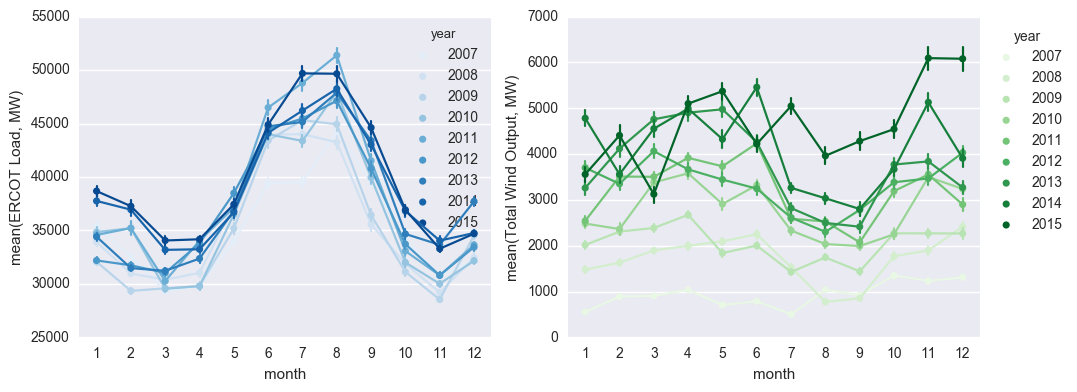

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
sns.pointplot('month', 'ERCOT Load, MW', data=ercot, hue='year', 
              palette='Blues', scale=0.5, ax=ax1)
sns.pointplot('month', 'Total Wind Output, MW', data=ercot, hue='year', 
              palette='Greens', scale=0.5, ax=ax2)
ax2.legend(bbox_to_anchor=(1, 1), loc=2, title='year')

plt.tight_layout()

path = os.path.join('..', 'Midterm Report', 'Monthly ERCOT load and wind2.svg')
plt.savefig(path, bbox_inches='tight')

There's a definite dip in wind output in the late summer/early fall (July-Sept). The dip has been getting shallower over time though. Oddly, there was a huge drop in wind output in March 2015.

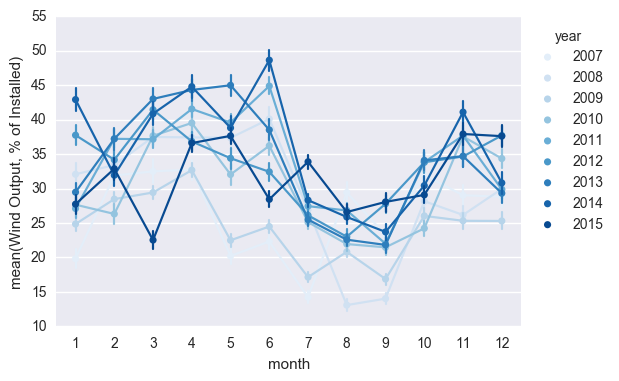

In [49]:
sns.pointplot('month', 'Wind Output, % of Installed', data=ercot, hue='year',
             palette='Blues', scale=0.5)
plt.legend(bbox_to_anchor=(1, 1), loc=2, title='year')

With the exception of 2007, almost all capacity additions happen in the second half of the year. 

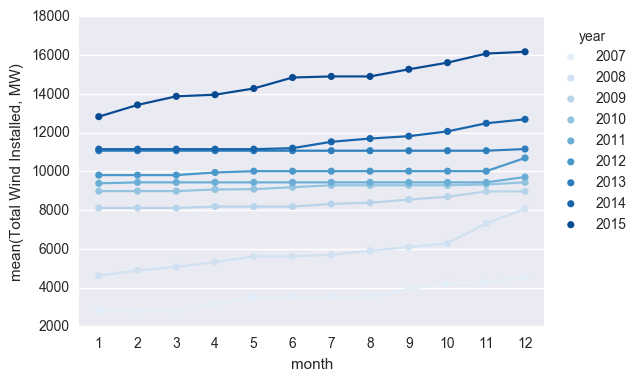

In [8]:
sns.pointplot('month', 'Total Wind Installed, MW', data=ercot, hue='year',
             palette='Blues', scale=0.5)
plt.legend(bbox_to_anchor=(1, 1), loc=2, title='year')
path = os.path.join('..', 'Midterm Report', 'Monthly ERCOT wind capacity.svg')
plt.savefig(path, bbox_inches='tight')

These distribution plots show hourly ERCOT load for each year. It's been slowly creeping up, with less of a peak around 30GW. 

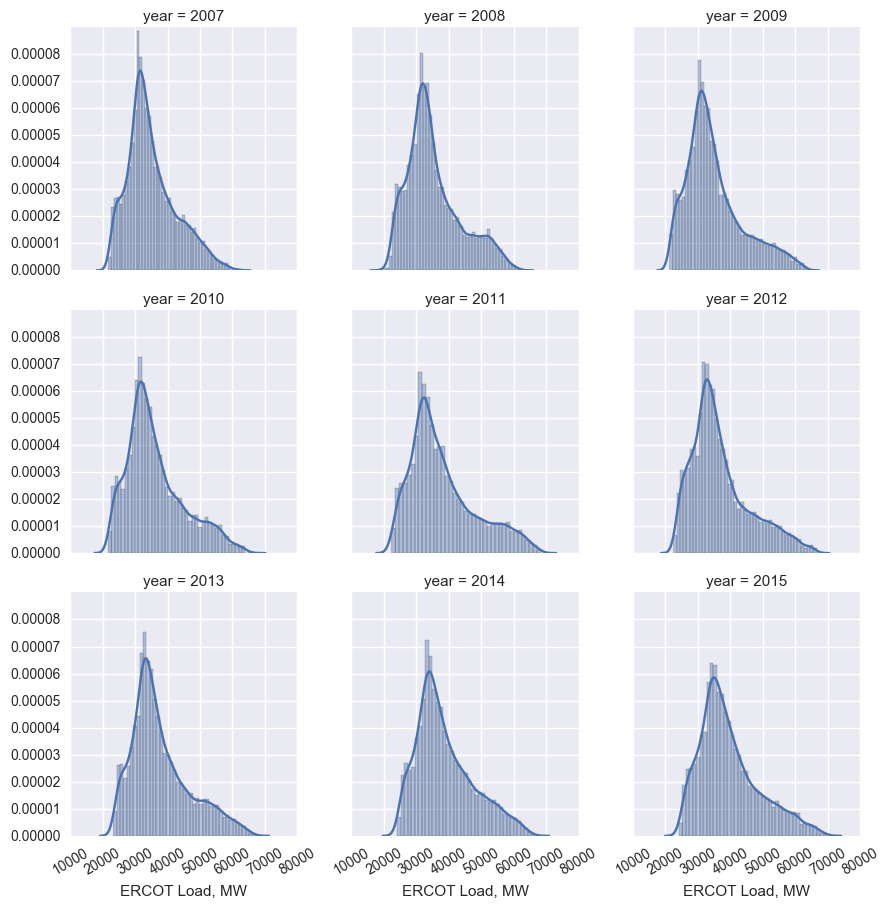

In [42]:
g = sns.FacetGrid(ercot, col='year', col_wrap=3)
g.map(sns.distplot,'ERCOT Load, MW')
g.set_xticklabels(rotation=30)

## EIA 860 data
Not sure what I'm seeing here yet. Some huge plants, but most of the rest are below 500MW? Most generation is NG, at least when using the largest amount of fuel in each plant as the basis for classification. (Looking at the EIA website, this is probably correct)

In [2]:
filename = 'EIA 860.pkl'
path = '../Clean Data'
fullpath = os.path.join(path, filename)

eia860 = pickle.load(open(fullpath, 'rb'))

In [16]:
eia860.keys()

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [3]:
all860 = pd.concat(eia860)

In [4]:
all860.head()

PLANT_ID  NAMEPLATE_CAPACITY(MW)
2007 0         2                    45.0
     1         3                  2671.4
     2         4                   225.0
     3         7                   138.0
     4         8                  1416.7

In [5]:
all860['year'] = all860.index.get_level_values(0)

In [6]:
all860.reset_index(drop=True, inplace=True)

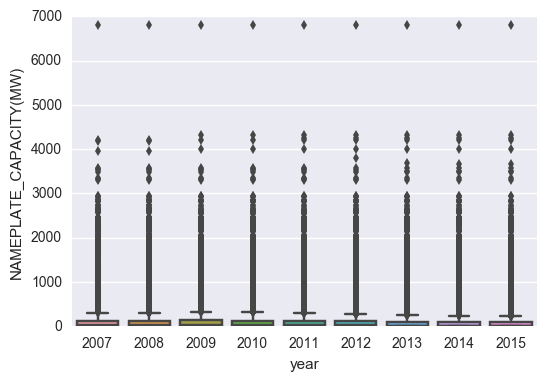

In [33]:
sns.boxplot(x='year', y='NAMEPLATE_CAPACITY(MW)', data=all860)

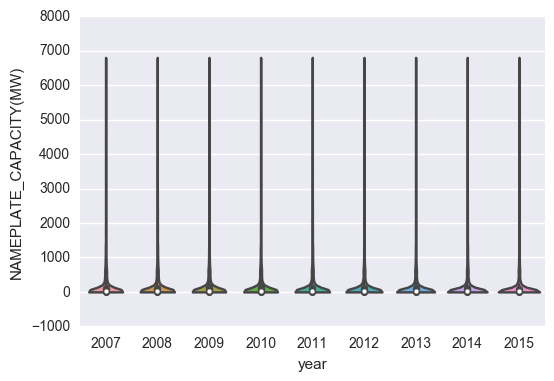

In [30]:
sns.violinplot(x='year', y='NAMEPLATE_CAPACITY(MW)', data=all860, cut=0)

### A test of using fuel classifications from 860 to sum capacity by fuel

In [7]:
df = eia860[2007]

In [12]:
df = df.merge(eia923[2007][['PLANT_ID', 'fuel', 'NET_GENERATION_(MEGAWATTHOURS)']], on='PLANT_ID')

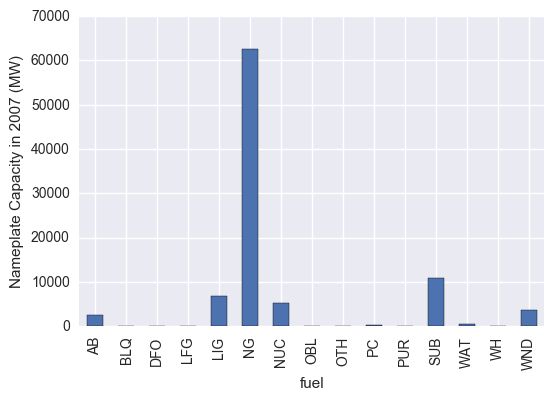

In [103]:
df.groupby('fuel').sum()['NAMEPLATE_CAPACITY(MW)'].plot(kind='bar')
plt.ylabel('Nameplate Capacity in 2007 (MW)')

Of the fuels shown the plot above, we only need to look at:
- DFO (diesel fuel)
- LIG (lignite coal)
- NG (natural gas)
- PC (petroleum coke)
- SUB (subbituminous coal)

In [13]:
df = df[df['fuel'].isin(['DFO', 'LIG', 'NG', 'PC', 'SUB'])]

In [105]:
df.head()

,PLANT_ID,NAMEPLATE_CAPACITY(MW),fuel,NET_GENERATION_(MEGAWATTHOURS)
0,127,720.0,SUB,4.205893e+06
1,298,1849.8,LIG,1.359215e+07
5,3439,187.2,NG,7.943600e+05
6,3452,927.5,NG,5.711710e+05
7,3453,958.3,NG,3.782020e+05


In [14]:
def CF(row):
    possible_gen = row['NAMEPLATE_CAPACITY(MW)'] * 8760
    cf = row['NET_GENERATION_(MEGAWATTHOURS)'] / possible_gen
    return cf

df['Capacity Factor'] = df.apply(CF, axis=1)

In [15]:
df.head()

,PLANT_ID,NAMEPLATE_CAPACITY(MW),fuel,NET_GENERATION_(MEGAWATTHOURS),Capacity Factor
0,127,720.0,SUB,4.205893e+06,0.666840
1,298,1849.8,LIG,1.359215e+07,0.838802
5,3439,187.2,NG,7.943600e+05,0.484404
6,3452,927.5,NG,5.711710e+05,0.070299
7,3453,958.3,NG,3.782020e+05,0.045052


Apparently one of the plants has something weird going on - tiny nameplate capacity and a CF of 11. And another one has negative net generation?

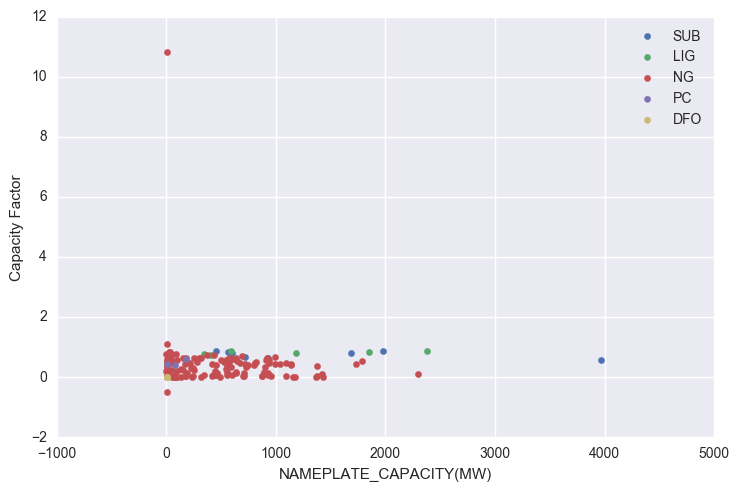

In [124]:
g = sns.FacetGrid(df, hue='fuel', size=5, aspect=1.5)
g.map(plt.scatter, 'NAMEPLATE_CAPACITY(MW)', 'Capacity Factor')
plt.legend()

The figure below can be used in the midterm report.

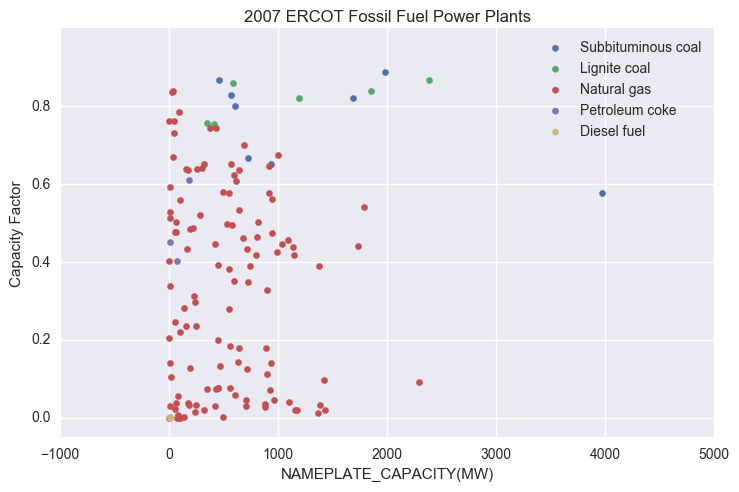

In [17]:
g = sns.FacetGrid(df, hue='fuel', size=5, aspect=1.5, ylim=(-0.05,1))
g.map(plt.scatter, 'NAMEPLATE_CAPACITY(MW)', 'Capacity Factor')
plt.title('2007 ERCOT Fossil Fuel Power Plants')
plt.legend(labels=['Subbituminous coal', 'Lignite coal', 'Natural gas', 'Petroleum coke', 'Diesel fuel'])
plt.tight_layout()
path = os.path.join('Midterm figures', 'ERCOT power plants 2007.svg')
plt.savefig(path)

## EIA 923 data


In [8]:
filename = 'EIA 923.pkl'
path = '../Clean Data'
fullpath = os.path.join(path, filename)

eia923 = pickle.load(open(fullpath, 'rb'))

In [35]:
eia923.keys()

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [39]:
[(idx, x) for idx, x in enumerate(eia923[2007].columns)]

[(0, 'PLANT_ID'),
 (1, 'PLANT_NAME'),
 (2, 'YEAR'),
 (3, u'TOTAL_FUEL_CONSUMPTION_QUANTITY'),
 (4, u'ELEC_FUEL_CONSUMPTION_QUANTITY'),
 (5, u'TOTAL_FUEL_CONSUMPTION_MMBTU'),
 (6, u'ELEC_FUEL_CONSUMPTION_MMBTU'),
 (7, u'NET_GENERATION_(MEGAWATTHOURS)'),
 (8, u'MMBTU_PER_UNIT_JAN'),
 (9, u'MMBTU_PER_UNIT_FEB'),
 (10, u'MMBTU_PER_UNIT_MAR'),
 (11, u'MMBTU_PER_UNIT_APR'),
 (12, u'MMBTU_PER_UNIT_MAY'),
 (13, u'MMBTU_PER_UNIT_JUN'),
 (14, u'MMBTU_PER_UNIT_JUL'),
 (15, u'MMBTU_PER_UNIT_AUG'),
 (16, u'MMBTU_PER_UNIT_SEP'),
 (17, u'MMBTU_PER_UNIT_OCT'),
 (18, u'MMBTU_PER_UNIT_NOV'),
 (19, u'MMBTU_PER_UNIT_DEC'),
 (20, u'TOT_MMBTU_JAN'),
 (21, u'TOT_MMBTU_FEB'),
 (22, u'TOT_MMBTU_MAR'),
 (23, u'TOT_MMBTU_APR'),
 (24, u'TOT_MMBTU_MAY'),
 (25, u'TOT_MMBTU_JUN'),
 (26, u'TOT_MMBTU_JUL'),
 (27, u'TOT_MMBTU_AUG'),
 (28, u'TOT_MMBTU_SEP'),
 (29, u'TOT_MMBTU_OCT'),
 (30, u'TOT_MMBTU_NOV'),
 (31, u'TOT_MMBTU_DEC'),
 (32, u'NETGEN_JAN'),
 (33, u'NETGEN_FEB'),
 (34, u'NETGEN_MAR'),
 (35, u'NETGEN_APR'),
 

Define a list of fuel types

In [45]:
fuels = [text[29:] for text in eia923[2007].columns[44:70]]

In [46]:
fuels

[u'AB',
 u'BIT',
 u'BLQ',
 u'DFO',
 u'JF',
 u'LFG',
 u'LIG',
 u'MWH',
 u'NG',
 u'NUC',
 u'OBG',
 u'OBL',
 u'OBS',
 u'OG',
 u'OTH',
 u'PC',
 u'PUR',
 u'RFO',
 u'SC',
 u'SUB',
 u'SUN',
 u'WAT',
 u'WDS',
 u'WH',
 u'WND',
 u'WO']

In [51]:
eia923[2007].iloc[0,44:70].idxmax()[29:]

u'WAT'

In [10]:
def top_fuel(row):
    #Fraction of largest fuel for electric heat input 
    try:
        fuel = row.iloc[44:70].idxmax()[29:]
    except:
        print row.iloc[44:70]
        return None
    return fuel

In [68]:
top_fuel(eia923[2007].loc[0,:])

u'WAT'

In [76]:
eia923[2007].apply(top_fuel, axis=1).value_counts()

NG     123
WND     28
WAT     21
LFG     10
SUB      8
AB       7
LIG      6
DFO      3
PC       3
NUC      2
PUR      1
BLQ      1
WH       1
OBL      1
OTH      1
dtype: int64

In [82]:
eia923[2011].apply(top_fuel, axis=1).value_counts()

ELEC_FUEL_CONSUMPTION_QUANTITY %PUR       0
ELEC_FUEL_CONSUMPTION_QUANTITY %RFO       0
ELEC_FUEL_CONSUMPTION_QUANTITY %SC        0
ELEC_FUEL_CONSUMPTION_QUANTITY %SUB       0
ELEC_FUEL_CONSUMPTION_QUANTITY %SUN       0
ELEC_FUEL_CONSUMPTION_QUANTITY %WAT       0
ELEC_FUEL_CONSUMPTION_QUANTITY %WDS       0
ELEC_FUEL_CONSUMPTION_QUANTITY %WH        0
ELEC_FUEL_CONSUMPTION_QUANTITY %WND       0
ELEC_FUEL_CONSUMPTION_QUANTITY %WO        0
MMBTU_PER_UNIT_APR                        .
MMBTU_PER_UNIT_AUG                        .
MMBTU_PER_UNIT_DEC                        .
MMBTU_PER_UNIT_FEB                        0
MMBTU_PER_UNIT_JAN                        0
MMBTU_PER_UNIT_JUL                        .
MMBTU_PER_UNIT_JUN                        .
MMBTU_PER_UNIT_MAR                        0
MMBTU_PER_UNIT_MAY                        .
MMBTU_PER_UNIT_NOV                        .
MMBTU_PER_UNIT_OCT                        .
MMBTU_PER_UNIT_SEP                        .
NETGEN_APR                      

          239
Y %PUR     13
dtype: int64

In [11]:
eia923[2007]['fuel'] = eia923[2007].apply(top_fuel, axis=1)

In [84]:
eia923[2007]

,PLANT_ID,PLANT_NAME,YEAR,TOTAL_FUEL_CONSUMPTION_QUANTITY,ELEC_FUEL_CONSUMPTION_QUANTITY,TOTAL_FUEL_CONSUMPTION_MMBTU,ELEC_FUEL_CONSUMPTION_MMBTU,NET_GENERATION_(MEGAWATTHOURS),MMBTU_PER_UNIT_JAN,MMBTU_PER_UNIT_FEB,...,TOTAL_FUEL_CONSUMPTION_QUANTITY %RFO,TOTAL_FUEL_CONSUMPTION_QUANTITY %SC,TOTAL_FUEL_CONSUMPTION_QUANTITY %SUB,TOTAL_FUEL_CONSUMPTION_QUANTITY %SUN,TOTAL_FUEL_CONSUMPTION_QUANTITY %WAT,TOTAL_FUEL_CONSUMPTION_QUANTITY %WDS,TOTAL_FUEL_CONSUMPTION_QUANTITY %WH,TOTAL_FUEL_CONSUMPTION_QUANTITY %WND,TOTAL_FUEL_CONSUMPTION_QUANTITY %WO,fuel
0,3584,H 5,2007,0.0,0.0,109110.0,109110.0,1.103900e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT
1,3585,Nolte,2007,0.0,0.0,118993.0,118993.0,1.203900e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT
2,3586,TP 4,2007,0.0,0.0,142735.0,142735.0,1.444100e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT
3,6147,Monticello,2007,11807274.0,11807274.0,171279117.0,171279117.0,1.539900e+07,34.452,34.281,...,0.0,0.0,0.529492,0.0,0.0,0.0,0.0,0.0,0.0,SUB
4,6145,Comanche Peak,2007,0.0,0.0,197597659.0,197597659.0,1.884575e+07,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NUC
5,3594,Austin,2007,0.0,0.0,414654.0,414654.0,4.195200e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT
6,3595,Buchanan,2007,0.0,0.0,381949.0,381949.0,3.864300e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT
7,3597,Granite Shoals,2007,0.0,0.0,746904.0,746904.0,7.556700e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT
8,3598,Inks,2007,0.0,0.0,149072.0,149072.0,1.508200e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT
9,3599,Marble Falls,2007,0.0,0.0,373120.0,373120.0,3.775000e+04,0.000,0.000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,WAT


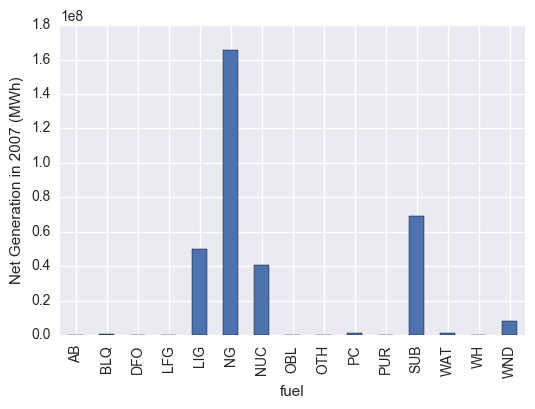

In [88]:
eia923[2007].groupby('fuel').sum()['NET_GENERATION_(MEGAWATTHOURS)'].plot(kind='bar')
plt.ylabel('Net Generation in 2007 (MWh)')

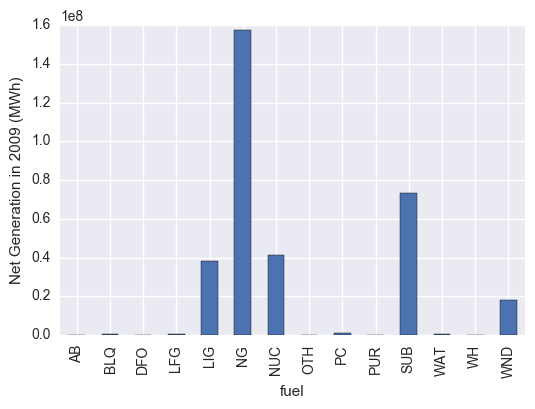

In [90]:
eia923[2009]['fuel'] = eia923[2009].apply(top_fuel, axis=1)
eia923[2009].groupby('fuel').sum()['NET_GENERATION_(MEGAWATTHOURS)'].plot(kind='bar')
plt.ylabel('Net Generation in 2009 (MWh)')

## EPA hourly data
Load the zipped pickle file. Takes a couple min, but at least the data file is less than 60 MB.

In [9]:
# load a zipped pickle file 
# from http://stackoverflow.com/questions/18474791/decreasing-the-size-of-cpickle-objects
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [10]:
filename = 'EPA hourly dictionary.pgz'
path = '../Clean Data'
fullpath = os.path.join(path, filename)

epaDict = load_zipped_pickle(fullpath)

In [11]:
df = epaDict['2015 July-Dec']
set(df['PLANT_ID'])

{127,
 298,
 3439,
 3441,
 3443,
 3452,
 3453,
 3460,
 3464,
 3468,
 3469,
 3470,
 3476,
 3477,
 3478,
 3490,
 3491,
 3492,
 3494,
 3497,
 3504,
 3507,
 3548,
 3559,
 3576,
 3601,
 3611,
 3612,
 3628,
 3631,
 4266,
 4937,
 4939,
 6136,
 6139,
 6147,
 6178,
 6179,
 6180,
 6181,
 6183,
 6243,
 6648,
 7030,
 7097,
 7325,
 7900,
 8063,
 52176,
 55015,
 55091,
 55139,
 55153,
 55215,
 55223,
 56350,
 56674}

In [12]:
df_temp = df[df['PLANT_ID'].isin([127, 298, 3439])].fillna(0)

In [13]:
df_temp.head()

,STATE,FACILITY NAME,PLANT_ID,YEAR,DATE,HOUR,GROSS LOAD (MW),STEAM LOAD (1000LB/HR),SO2 (POUNDS),NOX (POUNDS),CO2 (SHORT TONS),EPA REGION,NERC REGION,COUNTY,HEAT INPUT (MMBTU),FACILITY LATITUDE,FACILITY LONGITUDE,DATETIME
79488,TX,Laredo,3439,2015,2015-07-01,0,0.0,0.0,0.0,0.0,0.0,6,ERCOT,Webb,0.0,27.5667,-99.5083,2015-07-01 00:00:00
79489,TX,Laredo,3439,2015,2015-07-01,1,0.0,0.0,0.0,0.0,0.0,6,ERCOT,Webb,0.0,27.5667,-99.5083,2015-07-01 01:00:00
79490,TX,Laredo,3439,2015,2015-07-01,2,0.0,0.0,0.0,0.0,0.0,6,ERCOT,Webb,0.0,27.5667,-99.5083,2015-07-01 02:00:00
79491,TX,Laredo,3439,2015,2015-07-01,3,0.0,0.0,0.0,0.0,0.0,6,ERCOT,Webb,0.0,27.5667,-99.5083,2015-07-01 03:00:00
79492,TX,Laredo,3439,2015,2015-07-01,4,0.0,0.0,0.0,0.0,0.0,6,ERCOT,Webb,0.0,27.5667,-99.5083,2015-07-01 04:00:00


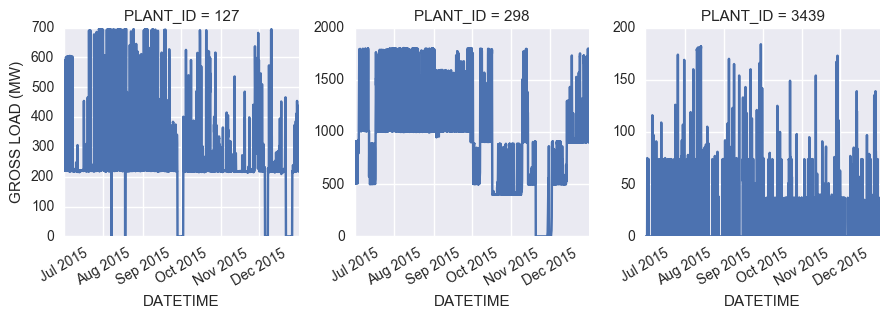

In [17]:
g = sns.FacetGrid(df_temp, col='PLANT_ID', sharey=False)
g.map(plt.plot, 'DATETIME', 'GROSS LOAD (MW)')
g.set_xticklabels(rotation=30)

path = os.path.join('Midterm figures', 'Sample hourly load.svg')
plt.savefig(path)